# 반도체 공정 데이터를 활용한 공정 이상 예측

---

## 프로젝트 목표
- 반도체 공정 데이터 분석을 통하여 공정 이상을 예측하는 분류 모델 수행
- 공정 이상에 영향을 미치는 요소들에 대한 데이터 분석

---

## 프로젝트 개요

제조 분야의 디지털 트랜스포메이션이 진행되면서 제조 공정에서 일어나는 수많은 정보가 데이터로 정리되고 있습니다. 제조 공정의 이상을 탐지 분야는 이러한 데이터 바탕으로 구현되는 인공지능 기술로 기존 확률 기반의 예측보다 높은 효율을 내고 있습니다. 이러한 이상 탐지 알고리즘은 불량률을 예측하는 것 뿐만 아니라 어떠한 요소가 불량품을 나오게 하는지 그 원인을 파악하는데 또한 도움을 줄 수 있습니다. 따라서 제조 분야에서의 인공지능을 활용한 이상 탐지는 계속 연구되고 있으며 빠르게 적용되며 그 효율을 보여주고 있습니다.

이번 실습에서는 UCI에서 제공하는 SECOM 공정에서 측정된 센서 데이터를 기반으로 한 데이터를 바탕으로 공정 이상을 예측해보는 분류 모델을 구현합니다. 이를 활용하여 센서 데이터가 주어 졌을 때 공정 이상이 생기는지를 예측할 수 있으며, 공정 이상 시 어떠한 센서들이 중요한 역할을 하는지 알아봅니다.

---

## 1. 데이터 읽기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\PC\anaconda3\envs\vmconda\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\PC\anaconda3\envs\vmconda\lib\site-packages\numpy\.libs\libopenblas.TXA6YQSD3GCQQC22GEQ54J2UDCXDXHWN.gfortran-win_amd64.dll
C:\Users\PC\anaconda3\envs\vmconda\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  stacklevel=1)


In [2]:
import os

In [3]:
os.listdir('data')

['uci-secom-test.csv', 'uci-secom.csv']

In [4]:
data = pd.read_csv('./data/uci-secom.csv')
data

,Time,0,1,2,3,4,5,6,7,8,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,...,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,-1
1,2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,...,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2,2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,...,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2008-07-19 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,...,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
4,2008-07-19 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,...,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,2008-10-16 15:13:00,2899.41,2464.36,2179.7333,3085.3781,1.4843,100.0,82.2467,0.1248,1.3424,...,203.1720,0.4988,0.0143,0.0039,2.8669,0.0068,0.0138,0.0047,203.1720,-1
1563,2008-10-16 20:49:00,3052.31,2522.55,2198.5667,1124.6595,0.8763,100.0,98.4689,0.1205,1.4333,...,NaN,0.4975,0.0131,0.0036,2.6238,0.0068,0.0138,0.0047,203.1720,-1
1564,2008-10-17 05:26:00,2978.81,2379.78,2206.3000,1110.4967,0.8236,100.0,99.4122,0.1208,NaN,...,43.5231,0.4987,0.0153,0.0041,3.0590,0.0197,0.0086,0.0025,43.5231,-1
1565,2008-10-17 06:01:00,2894.92,2532.01,2177.0333,1183.7287,1.5726,100.0,98.7978,0.1213,1.4622,...,93.4941,0.5004,0.0178,0.0038,3.5662,0.0262,0.0245,0.0075,93.4941,-1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1567 entries, 0 to 1566
Columns: 592 entries, Time to Pass/Fail
dtypes: float64(590), int64(1), object(1)
memory usage: 7.1+ MB


In [6]:
data.shape

(1567, 592)

In [7]:
data.describe()

,0,1,2,3,4,5,6,7,8,9,...,581,582,583,584,585,586,587,588,589,Pass/Fail
count,1561.000000,1560.000000,1553.000000,1553.000000,1553.000000,1553.0,1553.000000,1558.000000,1565.000000,1565.000000,...,618.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1567.000000
mean,3014.452896,2495.850231,2200.547318,1396.376627,4.197013,100.0,101.112908,0.121822,1.462862,-0.000841,...,97.934373,0.500096,0.015318,0.003847,3.067826,0.021458,0.016475,0.005283,99.670066,-0.867262
std,73.621787,80.407705,29.513152,441.691640,56.355540,0.0,6.237214,0.008961,0.073897,0.015116,...,87.520966,0.003404,0.017180,0.003720,3.578033,0.012358,0.008808,0.002867,93.891919,0.498010
min,2743.240000,2158.750000,2060.660000,0.000000,0.681500,100.0,82.131100,0.000000,1.191000,-0.053400,...,0.000000,0.477800,0.006000,0.001700,1.197500,-0.016900,0.003200,0.001000,0.000000,-1.000000
25%,2966.260000,2452.247500,2181.044400,1081.875800,1.017700,100.0,97.920000,0.121100,1.411200,-0.010800,...,46.184900,0.497900,0.011600,0.003100,2.306500,0.013425,0.010600,0.003300,44.368600,-1.000000
50%,3011.490000,2499.405000,2201.066700,1285.214400,1.316800,100.0,101.512200,0.122400,1.461600,-0.001300,...,72.288900,0.500200,0.013800,0.003600,2.757650,0.020500,0.014800,0.004600,71.900500,-1.000000
75%,3056.650000,2538.822500,2218.055500,1591.223500,1.525700,100.0,104.586700,0.123800,1.516900,0.008400,...,116.539150,0.502375,0.016500,0.004100,3.295175,0.027600,0.020300,0.006400,114.749700,-1.000000
max,3356.350000,2846.440000,2315.266700,3715.041700,1114.536600,100.0,129.252200,0.128600,1.656400,0.074900,...,737.304800,0.509800,0.476600,0.104500,99.303200,0.102800,0.079900,0.028600,737.304800,1.000000


## 2. 데이터 정제

In [8]:
data.isnull().sum()

Time          0
0             6
1             7
2            14
3            14
             ..
586           1
587           1
588           1
589           1
Pass/Fail     0
Length: 592, dtype: int64

In [9]:
# 여기서 결측값을 0으로 바꿈

data_cleaning = data.replace(np.NaN,0)
data_cleaning

,Time,0,1,2,3,4,5,6,7,8,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,...,0.0000,0.5005,0.0118,0.0035,2.3630,0.0000,0.0000,0.0000,0.0000,-1
1,2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,...,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2,2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,...,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2008-07-19 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,...,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
4,2008-07-19 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,...,0.0000,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,2008-10-16 15:13:00,2899.41,2464.36,2179.7333,3085.3781,1.4843,100.0,82.2467,0.1248,1.3424,...,203.1720,0.4988,0.0143,0.0039,2.8669,0.0068,0.0138,0.0047,203.1720,-1
1563,2008-10-16 20:49:00,3052.31,2522.55,2198.5667,1124.6595,0.8763,100.0,98.4689,0.1205,1.4333,...,0.0000,0.4975,0.0131,0.0036,2.6238,0.0068,0.0138,0.0047,203.1720,-1
1564,2008-10-17 05:26:00,2978.81,2379.78,2206.3000,1110.4967,0.8236,100.0,99.4122,0.1208,0.0000,...,43.5231,0.4987,0.0153,0.0041,3.0590,0.0197,0.0086,0.0025,43.5231,-1
1565,2008-10-17 06:01:00,2894.92,2532.01,2177.0333,1183.7287,1.5726,100.0,98.7978,0.1213,1.4622,...,93.4941,0.5004,0.0178,0.0038,3.5662,0.0262,0.0245,0.0075,93.4941,-1


In [10]:
data_cleaning.isnull().sum()

Time         0
0            0
1            0
2            0
3            0
            ..
586          0
587          0
588          0
589          0
Pass/Fail    0
Length: 592, dtype: int64

In [55]:
data_cleaning = data_cleaning.drop(columns=['Time'], axis=1)
data_cleaning

,0,1,2,3,4,5,6,7,8,9,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,...,0.0000,0.5005,0.0118,0.0035,2.3630,0.0000,0.0000,0.0000,0.0000,-1
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,-0.0005,...,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,0.0041,...,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,-0.0124,...,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,-0.0031,...,0.0000,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,2899.41,2464.36,2179.7333,3085.3781,1.4843,100.0,82.2467,0.1248,1.3424,-0.0045,...,203.1720,0.4988,0.0143,0.0039,2.8669,0.0068,0.0138,0.0047,203.1720,-1
1563,3052.31,2522.55,2198.5667,1124.6595,0.8763,100.0,98.4689,0.1205,1.4333,-0.0061,...,0.0000,0.4975,0.0131,0.0036,2.6238,0.0068,0.0138,0.0047,203.1720,-1
1564,2978.81,2379.78,2206.3000,1110.4967,0.8236,100.0,99.4122,0.1208,0.0000,0.0000,...,43.5231,0.4987,0.0153,0.0041,3.0590,0.0197,0.0086,0.0025,43.5231,-1
1565,2894.92,2532.01,2177.0333,1183.7287,1.5726,100.0,98.7978,0.1213,1.4622,-0.0072,...,93.4941,0.5004,0.0178,0.0038,3.5662,0.0262,0.0245,0.0075,93.4941,-1


In [56]:
data_cleaning.shape

(1567, 591)

## 3. 데이터 시각화

- 센서에 관련된 590개의 변수들은 시각화하기에 너무 양이 많기에 영향력이 크다고 판단되는 `59` 센서에 대해서만 시각화를 진행
- `59`번 데이터는 머신러닝 모델을 사용했을 때, 높은 중요도로 뽑힌 변수이기에 대표로 출력

### 3-1. `Pass/Fail` 시각화

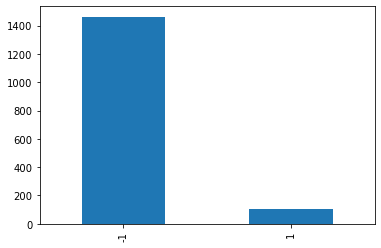

-1    1463
 1     104
Name: Pass/Fail, dtype: int64

In [11]:
data['Pass/Fail'].value_counts().plot(kind='bar')
plt.show()

# 도수 분포 시각화

data['Pass/Fail'].value_counts()

### 3-2. `센서 데이터` 시각화

- 다수의 feature 데이터에 대해서 한눈에 볼 수 있도록 시각화를 수행할 때는 seaborn의 `pairplot`를 활용하여 해결할 수 있음
- 590개 센서에 대한 출력을 `pairplot`으로 수행하기엔 출력 결과도 보기 힘들뿐더러 출력 시간도 매우 오래 걸림
-  3,4,5, Pass/Fail 데이터에 대해서만 출력함

In [12]:
data_set = data[['3', '4', '5', 'Pass/Fail']]
data_set.head(3)

,3,4,5,Pass/Fail
0,1411.1265,1.3602,100.0,-1
1,1463.6606,0.8294,100.0,-1
2,1698.0172,1.5102,100.0,1


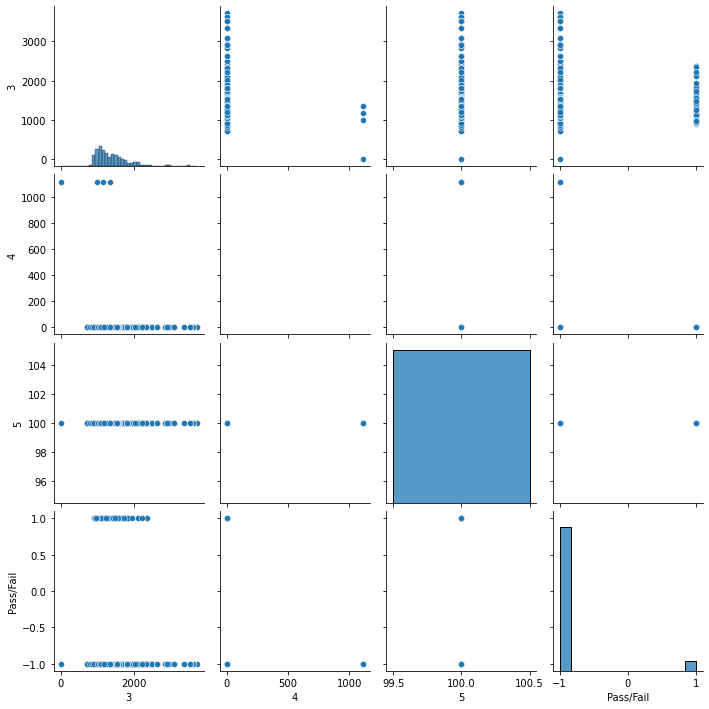

In [13]:
# saaborn의 pairplot()을 사용하여 컬럼끼리 비교 

sns.pairplot(data_set)

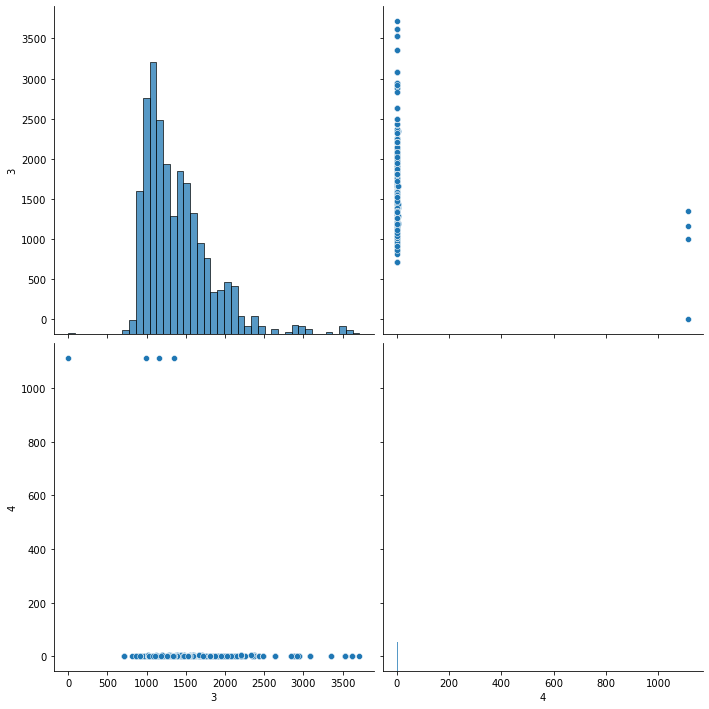

In [14]:
# vars를 사용해서 특정한 컬럼끼리 비교 가능

sns.pairplot(data_set, height=5, vars=['3','4'])

### 3-2. `59번 센서 ` 시각화

C:\Users\PC\anaconda3\envs\vmconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, '59 Sensor Measurements')

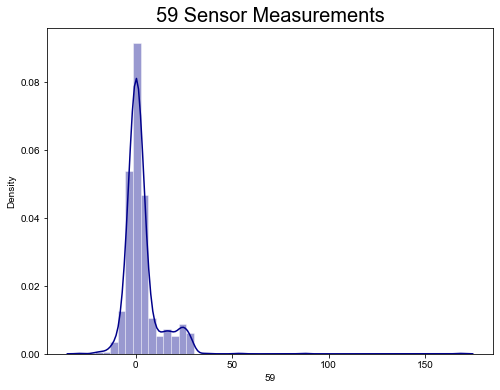

In [15]:
fig, ax = plt.subplots(figsize=(8, 6))

sns.set(style='darkgrid')
sns.distplot(data['59'], color = 'darkblue')


plt.title('59 Sensor Measurements', fontsize = 20)

C:\Users\PC\anaconda3\envs\vmconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\PC\anaconda3\envs\vmconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\PC\anaconda3\envs\vmconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibili

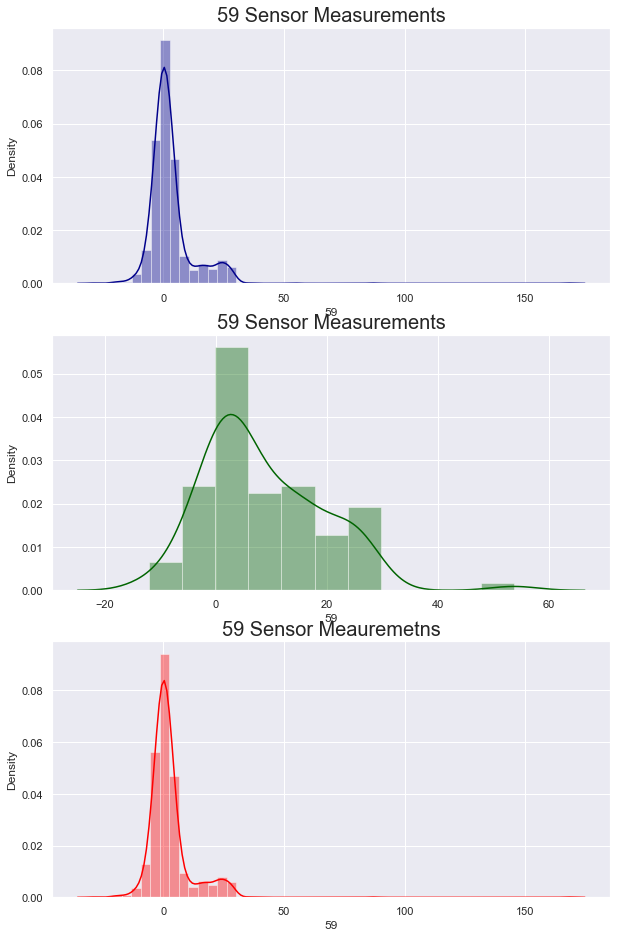

In [16]:
plt.rcParams['figure.figsize'] = (10,16)

# 3x1 형태로 그래프를 출력하기 위하여 subplot을 설정합니다. 
# subplot(행, 열, 인덱스)로 그래프의 위치를 정합니다. 
plt.subplot(3, 1, 1)
sns.distplot(data['59'], color = 'darkblue')
plt.title('59 Sensor Measurements', fontsize = 20)


# 'Pass/Fail' 값이 1인 데이터 출력
# data[data['Pass/Fail']==1]을 하면 'Pass/Fail' 값이 1인 행만 사용

plt.subplot(3,1,2)
sns.distplot(data[data['Pass/Fail']==1]['59'], color='darkgreen')
plt.title('59 Sensor Measurements', fontsize=20)

# 'Pass/Fail' 값이 -1인 데이터 출력
plt.subplot(3,1,3)
sns.distplot(data[data['Pass/Fail']==-1]['59'], color='red')
plt.title('59 Sensor Meauremetns', fontsize=20)

plt.show()

C:\Users\PC\anaconda3\envs\vmconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\PC\anaconda3\envs\vmconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\PC\anaconda3\envs\vmconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibili

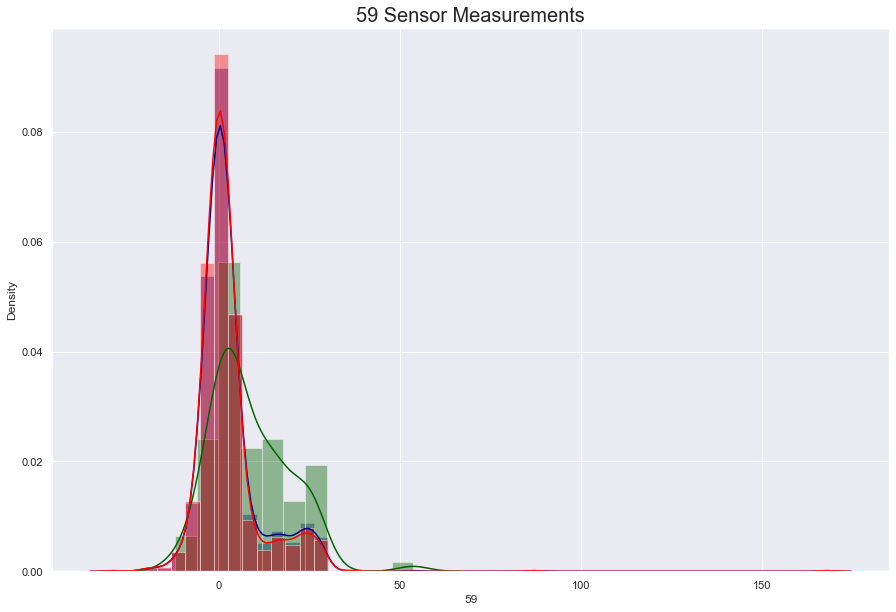

In [17]:
plt.rcParams['figure.figsize']= (15,10)

sns.distplot(data['59'], color='darkblue')
sns.distplot(data[data['Pass/Fail']==1]['59'], color='darkgreen')
sns.distplot(data[data['Pass/Fail']==-1]['59'], color='red')

plt.title('59 Sensor Measurements', fontsize= 20)
plt.show()

## 4. 데이터 전 처리

- 공정 이상 예측을 수행하기 위해서주어진 센서 데이터에 대해서 분류 모델을 사용
- 분류 모델의 필요한 입력 데이터를 준비 하기위해서 다음과 같은 전 처리를 수행

1. 전체 데이터를 feature 데이터인 `x`와 label 데이터인 `y`로 분리하기
2. StandardScaler를 통한 데이터 표준화하기

### 4.1.  `x`와  `y`로 분리

In [58]:
# 예측해야 할 변수인 `Pass/Fail`를 제거하여 머신러닝 입력값인 x에 저장
# data에는 'Pass/Fail'의 없어짐 
x = data_cleaning.drop(columns = ['Pass/Fail'], axis = 1)

# 예측해야 할 변수 `Pass/Fail`만을 선택하여 numpy 형태로 y에 저장
y = data_cleaning['Pass/Fail']

# 1차원 벡터 형태로 출력하기 위해 ravel 사용
y = y.to_numpy().ravel() 
y

array([-1, -1,  1, ..., -1, -1, -1], dtype=int64)

In [59]:
x

,0,1,2,3,4,5,6,7,8,9,...,580,581,582,583,584,585,586,587,588,589
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,...,0.0000,0.0000,0.5005,0.0118,0.0035,2.3630,0.0000,0.0000,0.0000,0.0000
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,-0.0005,...,0.0060,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,0.0041,...,0.0148,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602
3,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,-0.0124,...,0.0044,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,-0.0031,...,0.0000,0.0000,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,2899.41,2464.36,2179.7333,3085.3781,1.4843,100.0,82.2467,0.1248,1.3424,-0.0045,...,0.0047,203.1720,0.4988,0.0143,0.0039,2.8669,0.0068,0.0138,0.0047,203.1720
1563,3052.31,2522.55,2198.5667,1124.6595,0.8763,100.0,98.4689,0.1205,1.4333,-0.0061,...,0.0000,0.0000,0.4975,0.0131,0.0036,2.6238,0.0068,0.0138,0.0047,203.1720
1564,2978.81,2379.78,2206.3000,1110.4967,0.8236,100.0,99.4122,0.1208,0.0000,0.0000,...,0.0025,43.5231,0.4987,0.0153,0.0041,3.0590,0.0197,0.0086,0.0025,43.5231
1565,2894.92,2532.01,2177.0333,1183.7287,1.5726,100.0,98.7978,0.1213,1.4622,-0.0072,...,0.0075,93.4941,0.5004,0.0178,0.0038,3.5662,0.0262,0.0245,0.0075,93.4941


In [61]:
y

array([-1, -1,  1, ..., -1, -1, -1], dtype=int64)

In [62]:
type(y)

numpy.ndarray

- 원본 데이터의 수가 많지 않아 원본 데이터에서 샘플 데이터를 추출하고 노이즈를 추가하여 테스트 데이터를 생성
- `data` 폴더 내의 `uci-secom-test.csv`에 590개의 센서 데이터와 `Pass/Fail`저장되어 있기에 해당 데이터를 읽어와 `x_test, y_test` 데이터로 분리

In [63]:
data2 = pd.read_csv("data/uci-secom-test.csv")
x_test = data2.drop(columns = ['Pass/Fail'], axis = 1)
y_test = data2['Pass/Fail'].to_numpy().ravel() 

### 4.2. 데이터 표준화

- 각 변수 마다의 스케일 차이를 맞추기 위하여 표준화를 수행
- 표준화는 서로 다른 피처의 크기를 통일하기 위해서 크기를 변환해주는 개념
- 데이터의 피처 각각이 평균이 0이고 분산이 1인 가우시안 정규 분포를 형태와 가까워지도록 변환

In [64]:
from sklearn.preprocessing import StandardScaler

# 정규화를 위해서 StandardScaler 사용
sc = StandardScaler()

# x_train에 있는 데이터에 맞춰 정규화를 진행
x_train = sc.fit_transform(x)
x_test = sc.transform(x_test)
y_train = y

In [65]:
x_train_sc = pd.DataFrame(data=x_train)
x_train_sc

,0,1,2,3,4,5,6,7,8,9,...,580,581,582,583,584,585,586,587,588,589
0,0.139998,0.429208,0.032735,0.059342,-0.049911,0.094946,-0.228536,0.239971,0.436850,1.128343,...,-0.648235,-0.530195,0.055275,-0.204269,-0.092516,-0.196519,-1.734706,-1.868461,-1.840769,-1.061159
1,0.464020,-0.105874,0.236852,0.173847,-0.059375,0.094946,0.187826,0.278951,0.393723,0.022511,...,1.179427,2.327864,0.162312,0.407145,0.445214,0.385516,-0.958144,0.412587,0.251029,1.156951
2,-0.351256,0.407233,0.026413,0.684661,-0.047236,0.094946,-0.415634,0.232175,-0.192349,0.327111,...,3.859997,0.607241,-0.304064,0.022827,0.015030,0.030373,2.989383,3.624211,3.318999,-0.178407
3,-0.070903,-0.025985,0.086766,-1.033387,-0.050620,0.094946,0.354494,0.045074,0.300837,-0.765478,...,0.692050,0.483463,-0.059408,-0.291614,-0.361381,-0.282803,-0.100689,-0.177535,-0.306784,-0.274469
4,0.146544,0.098340,0.250931,-0.125070,-0.046823,0.094946,0.016475,0.185400,0.465600,-0.149655,...,-0.648235,-0.530195,-1.512057,26.860983,27.062850,26.907579,-0.100689,-0.177535,-0.306784,-0.274469
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1562,-0.517139,-0.110096,-0.005517,3.708612,-0.047698,0.094946,-1.581192,0.286746,-1.311414,-0.242360,...,0.783434,2.258782,-0.074699,-0.058694,0.015030,-0.055631,-1.184641,-0.302368,-0.202194,1.103337
1563,0.246823,0.204859,0.084535,-0.565054,-0.058538,0.094946,-0.153221,-0.048477,-0.306246,-0.348308,...,-0.648235,-0.530195,-0.174091,-0.128570,-0.065629,-0.123601,-1.184641,-0.302368,-0.202194,1.103337
1564,-0.120418,-0.567887,0.121512,-0.595924,-0.059478,0.094946,-0.070186,-0.025089,-16.155624,0.055619,...,0.113291,0.067254,-0.082344,-0.000465,0.068803,-0.001920,-0.141135,-0.892490,-0.969186,-0.597485
1565,-0.539573,0.256061,-0.018427,-0.436304,-0.046124,0.094946,-0.124269,0.013890,0.013330,-0.421147,...,1.636342,0.753215,0.047630,0.145110,-0.011856,0.139891,0.384663,0.911921,0.773979,-0.065118


In [66]:
#평균 
print(x_train_sc.mean())

0      4.987856e-17
1     -1.002672e-15
2      1.178948e-15
3     -2.176519e-16
4      1.813766e-17
           ...     
585   -4.761135e-17
586    9.975712e-17
587    9.975712e-17
588    2.720649e-16
589    5.894739e-17
Length: 590, dtype: float64


In [67]:
#분산
x_train_sc.var()

0      1.000639
1      1.000639
2      1.000639
3      1.000639
4      1.000639
         ...   
585    1.000639
586    1.000639
587    1.000639
588    1.000639
589    1.000639
Length: 590, dtype: float64

## 5. 머신러닝 모델 학습

- 전 처리된 데이터를 바탕으로 분류 모델을 학습을 수행하고 학습 결과를 출력
- **로지스틱 분류기(logistic regression classifier)**를 사용하여 학습을 수행


`로지스틱 회귀` 
- 로지스틱 회귀는 선형 회귀 방식을 분류에 적용한 알고리즘 
- 로지스틱 회귀는 회귀라는 말이 들어갔지만 분류에 사용됨 

- 로지스틱 회귀가 선형 회귀와 다른 점은 ***학습을 통해 선형 함수의 회귀 최적선을 찾는 것이 아님***
- 시그모이드 함수 최적선을 찾고 이 시그모이드 함수의 반환 값을 확률로 간주해 확률에 따라 분류를 결정
- 확률에 따라서 분류를 결정

- 로지스틱 회귀는 주로 이진(0과 1) 분류에 사용됩니다. 로지스틱 회귀에서 예측 값은 예측 확률의 의미함
- 예측 값 즉, 예측 확률이 0.5이상이면 1로, 그렇지 않으면 0으로 예측

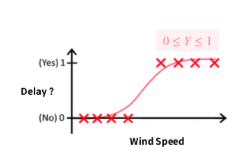

### 5.1. 기본 분류 모델 학습 - 로지스틱 분류기

In [69]:
from sklearn.linear_model import LogisticRegression

# max_iter는 로지스틱 알고리즘의 반복 횟수를 정하는 파라미터
model = LogisticRegression(max_iter=5000)

#모델 학습
model.fit(x_train, y_train)

# score 함수
print(model.score(x_train,y_train))
print(model.score(x_test, y_test))


0.9738353541799617
0.845


In [70]:
# Logistic Regression의 중요도 계산
# 가중치 값들의 크기로 판단하므로 .coef_로 해당 값을 불러옴

abs_coef = np.abs(model.coef_).ravel()
abs_coef

array([1.96731423e-02, 1.55771344e-01, 2.29979226e-01, 2.39596758e-01,
       3.21696232e-02, 4.46614481e-01, 1.24369244e-01, 4.99495103e-01,
       1.51324817e-01, 3.26936191e-01, 1.82699217e-01, 3.35320374e-02,
       2.09868391e-01, 0.00000000e+00, 5.07513225e-01, 2.70008695e-01,
       5.76699787e-01, 2.80755771e-01, 3.48457748e-01, 1.46571057e-01,
       2.64035087e-01, 5.32813292e-01, 1.52164227e-02, 1.55646851e-01,
       2.19341905e-01, 9.30253108e-01, 5.00535116e-01, 5.98131095e-02,
       1.27406471e-01, 9.00033398e-01, 6.57544648e-01, 7.48552132e-02,
       2.56489975e-01, 4.32739483e-01, 3.14402694e-02, 4.05799306e-01,
       1.99484646e-01, 9.99098776e-02, 1.11867754e-01, 2.00348591e-01,
       4.39557454e-01, 1.75688006e-01, 3.04167020e-04, 1.88402730e-01,
       1.89655705e-02, 5.38523450e-01, 2.55583038e-01, 2.44604809e-01,
       3.85268221e-01, 3.04167020e-04, 2.45889820e-01, 2.00949668e-01,
       0.00000000e+00, 4.37510117e-01, 6.24792343e-01, 2.74780686e-01,
      

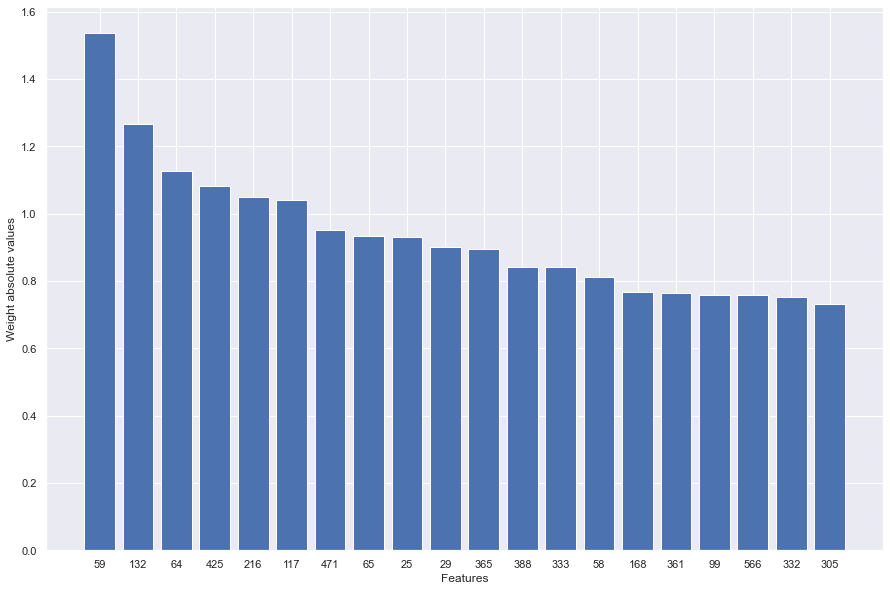

In [82]:
# bar 형태 그래프로 Logistic Regression의 feature 별 중요도를 상위 20개 출력합니다.
# 상위 20개의 feature 정보를 출력하기 위하여 sorting을 수행하고 해당 feature 번호를 LR_imort_x에 저장합니다.

LR_import_x = [ str(i[0]) for i in sorted(enumerate(abs_coef), key=lambda x:x[1], reverse=True)]

plt.bar(LR_import_x[:20], sorted(abs_coef, reverse = True)[:20])

plt.rcParams['figure.figsize'] = (15,10)
plt.xlabel('Features')
plt.ylabel('Weight absolute values')
plt.show()

**퀴즈1. 위 학습된 LogisticRegression 모델에서 Weight absolute value가 30번째인 값?**

첫 번째 Weight absolute value의 값은 `sorted(abs_coef, reverse=True)[0]`으로 구할 수 있음

In [85]:
sorted(abs_coef, reverse=True)[29]

0.65754464804591

### 5.2. 다양한 분류 모델 학습

In [88]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import xgboost as xgb
from xgboost.sklearn import XGBClassifier

In [89]:
#여러 모델을 append해서 추가합니다. 
models = []
models.append(('LDA', LinearDiscriminantAnalysis()))  # LDA 모델
models.append(('KNN', KNeighborsClassifier()))  # KNN 모델
models.append(('CART', DecisionTreeClassifier()))  # 의사결정트리 모델
models.append(('NB', GaussianNB()))  # 가우시안 나이브 베이즈 모델
models.append(('RF', RandomForestClassifier()))  # 랜덤포레스트 모델
models.append(('SVM', SVC(gamma='auto')))  # SVM 모델
models.append(('XGB', XGBClassifier()))  # XGB 모델

for name, model in models:
    # fit으로 학습을 합니다. 
    model.fit(x_train, y_train)
    
    # %s와 %f는 문자열 포맷팅으로 %s는 문자열, %f는 숫자형 데이터를 말합니다. 
    # 문자열 포맷팅 값은 괄호()안의 값과 대응됩니다.
    # score 함수를 사용하여 모델의 성능을 확인합니다.
    msg = "%s - train_score : %f, test score : %f" % (name, model.score(x_train, y_train), model.score(x_test, y_test))
    print(msg)

LDA - train_score : 0.971921, test score : 0.883333
KNN - train_score : 0.934269, test score : 0.548333
CART - train_score : 1.000000, test score : 0.655000
NB - train_score : 0.181238, test score : 0.570000
RF - train_score : 1.000000, test score : 0.505000
SVM - train_score : 0.938098, test score : 0.488333
[11:17:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\PC\anaconda3\envs\vmconda\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGB - train_score : 1.000000, test score : 0.688333


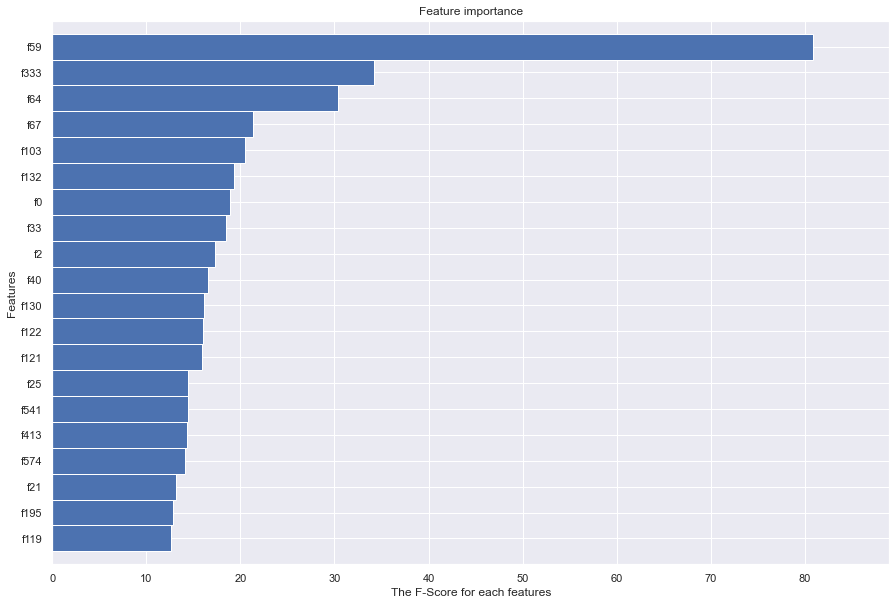

In [94]:
# xgb 모델에서 변수 중요도를 출력합니다.
# xgboost 모듈의 plot_importance는 피처 중요도를 시각화할 때 사용합니다. 
# models[-1][1]는 models 리스트에서 맨 마지막 요소(이것도 리스트)에서 두번째 요소를 말합니다. 
# importance_type는 중요도가 어떻게 계산되는지 정합니다. 
# weight는 나온 횟수를 말합니다. gain은 평균적인 이득을 말합니다. cover는 coverage의 평균입니다. 


xgb.plot_importance(models[-1][1], height= 1, grid=True, importance_type='total_gain', show_values=False, max_num_features=20)

plt.rcParams['figure.figsize']= (10,15)
plt.xlabel('The F-Score for each features')
plt.ylabel('Features')
plt.show()

## 6. 평가 및 예측

- 학습과정에서 학습 데이터와 테스트 데이터에 대해서 accuracy 계산하여 평가하였음
- accuracy의 경우 아래 식에서 알 수 있듯이 얼마나 정확히 예측했는가를 정량적으로 나타냄 

$Accuracy = \frac{Number \;of \;correct \;predictions}{Total \; number \;of \;predictions} $

- Accuracy 값이 높으면 좋은 성능을 낸다고도 할 수 있지만 이번 실습인 공정 이상 예측에서는 recall 값 또한 살펴봐야 함.

- 오차행렬(Confusion Matrix)은 이진 분류의 예측 오류가 얼마인지와 더불어 어떠한 유형의 예측 오류가 발생하고 있는지를 함께 나타내는 지표 

+ TN : Negative(0)로 예측했고, 실제로도 True인 경우 - 실제는 Negative
+ FP : Positive(1)로 예측했지만 실제는 False인 경우 - 실제는 Negative
+ FN : Negative(0)로 예측했고, 실제는 False인 경우 - 실제는 Positive
+ TP : Positive(1)로 예측했고, 실제로도 True인 경우 - 실제는 Positive

- 공정 이상 예측에서 중요한 것은 이상 없음을 정확히 예측하는 것 보단 이상 있음을 정확히 예측하는 것입니다. 
- recall 방식은 `예측한 이상 있음` 대비 `실제 이상 있음`의 비율을 나타내기에 accuracy에서 놓칠 수 있는 결과 해석을 보충함

- 정밀도(Precision)는 예측을 Positve로 한 대상 중에 예측과 실제 값이 Positive로 일치한 데이터의 비율을 뜻합니다. 
- 정밀도는 FP가 낮아야 합니다. 
+ TP / (FP + TP)

- 재현율(recall)은 실제 값이 Positive인 대상 중에 예측과 실제 값이 Positive로 일치한 데이터의 비율을 말합니다. 
- 재현율은 FN이 낮아야 합니다.
+ TP / (FN + TP)


### 6.1. Confusion Matrix

In [95]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

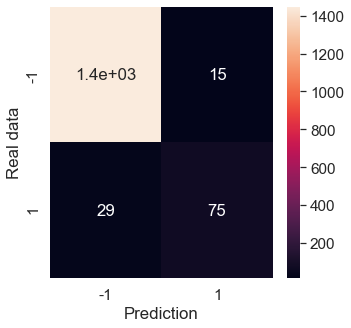

array([[1448,   15],
       [  29,   75]], dtype=int64)

In [98]:
# models[0] 은 LDA 
model_predition_train = models[0][1].predict(x_train)

cm_train = confusion_matrix(y_train, model_predition_train)


plt.rcParams['figure.figsize'] = (5,5)
sns.set(style='dark', font_scale= 1.4)

# annot은 annotate each cell with numeric value로 셀에 숫자값을 표시하는지 정하는 것입니다. 
# cmap으로 색깔을 지정할 수 있습니다. cmap='RdYlGn_r' cmap="YlGnBu"

ax = sns.heatmap(cm_train, annot=True)
plt.xlabel('Prediction')
plt.ylabel('Real data')
ax.set_xticklabels((-1,1))
ax.set_yticklabels((-1,1))
plt.show()

cm_train

위 confusion matrix에서 x 축은 실제 데이터의 label을 의미하고 y 축은 예측한 데이터의 label을 의미합니다.

- **0,0 의 값:** `이상 없음(Pass)` 이라고 예측했을 때, 실제 데이터가 `이상 없음(Pass)`인 경우의 개수
- **0,1 의 값:** `이상 있음(Fail)` 이라고 예측했을 때, 실제 데이터가 `이상 없음(Pass)`인 경우의 개수
- **1,0 의 값:** `이상 없음(Pass)` 이라고 예측했을 때, 실제 데이터가 `이상 있음(Fail)`인 경우의 개수
- **1,1 의 값:** `이상 있음(Fail)` 이라고 에측했을 때, 실제 데이터가 `이상 있음(Fail)`인 경우의 개수

**퀴즈2. LDA 모델에서 평가용 데이터(`x_test, y_test`)의 confusion matrix를 구하세요.**

In [102]:
model_predition_test = models[0][1].predict(x_test)

cm_test = confusion_matrix(y_test, model_predition_test)

### 6.2. Precision & Recall

In [103]:
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

print(recall_score(y_test, models[0][1].predict(x_test)))
print(precision_score(y_test, models[0][1].predict(x_test)))

0.7795527156549521
0.9959183673469387


### 6.3. 테스트 데이터의 예측값 출력

In [104]:
# 0번부터 9번까지 10개를 출력

for i in range(10):
    
    # LDA 모델 사용 
    prediction = models[0][1].predict(x_test[0].reshape(1,-1))
    
    print('{} 번째 테스트 데이터의 예측 결과: {}, 실제 데이터 : {}'.format(i, prediction[0], y_test[i]))

0 번째 테스트 데이터의 예측 결과: 1, 실제 데이터 : 1
1 번째 테스트 데이터의 예측 결과: 1, 실제 데이터 : -1
2 번째 테스트 데이터의 예측 결과: 1, 실제 데이터 : -1
3 번째 테스트 데이터의 예측 결과: 1, 실제 데이터 : 1
4 번째 테스트 데이터의 예측 결과: 1, 실제 데이터 : 1
5 번째 테스트 데이터의 예측 결과: 1, 실제 데이터 : -1
6 번째 테스트 데이터의 예측 결과: 1, 실제 데이터 : -1
7 번째 테스트 데이터의 예측 결과: 1, 실제 데이터 : 1
8 번째 테스트 데이터의 예측 결과: 1, 실제 데이터 : 1
9 번째 테스트 데이터의 예측 결과: 1, 실제 데이터 : 1
